<a href="https://colab.research.google.com/github/PattarapornH/cats-dogs-classifier/blob/master/cats_dogs_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from google.colab import drive

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [86]:
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [87]:
!ls 'gdrive/My Drive/Colab Notebooks/cats_dogs/'

cats_dogs_classifier.ipynb  test_set  training_set


In [0]:
# collect training data path
path_train = 'gdrive/My Drive/Colab Notebooks/cats_dogs/training_set/'
path_cats_train = []
path_dogs_train = []
for path in os.listdir(path_train + 'cats'):
  path_cats_train.append(os.path.join(path_train+'cats', path))
for path in os.listdir(path_train + 'dogs'):
  path_dogs_train.append(os.path.join(path_train+'dogs', path))

In [89]:
len(path_cats_train),len(path_dogs_train)

(4000, 4005)

In [90]:
# load training data
X_train = []
for i in range(8005):
  if(i%100 == 0):
    print('.', end='')
  if(i == 4000):
    print('\n')
  try:
    if(i < 4000):
      path = path_cats_train[i]
      img = load_img(path, target_size=(150, 150))
      X_train.append(img_to_array(img))
    else:
      path = path_dogs_train[i - 4000]
      img = load_img(path, target_size=(150, 150))
      X_train.append(img_to_array(img))
  except Exception as e:
    print(e)
    print(i)
    break

.........................................

........................................

In [91]:
X_train = np.array(X_train)
X_train.shape

(8005, 150, 150, 3)

In [0]:
# collect test data path
path_test = 'gdrive/My Drive/Colab Notebooks/cats_dogs/test_set/'
path_cats_test = []
path_dogs_test = []
for path in os.listdir(path_test + 'cats'):
  path_cats_test.append(os.path.join(path_test+'cats', path))
for path in os.listdir(path_test + 'dogs'):
  path_dogs_test.append(os.path.join(path_test+'dogs', path))

In [93]:
len(path_cats_test),len(path_dogs_test)

(1011, 1012)

In [94]:
# load test data
X_test = []
for i in range(2023):
  if(i%100 == 0):
    print('.', end='')
  if(i == 1012):
    print('\n')
  try:
    if(i < 1011):
      path = path_cats_test[i]
      img = load_img(path, target_size=(150, 150))
      X_test.append(img_to_array(img))
    else:
      path = path_dogs_test[i - 1011]
      img = load_img(path, target_size=(150, 150))
      X_test.append(img_to_array(img))
  except Exception as e:
    print(e)
    print(i)
    break

...........

..........

In [95]:
X_test = np.array(X_test)
X_test.shape

(2023, 150, 150, 3)

In [0]:
# init y --> 0 = cat, 1 = dog
y_train = np.concatenate((np.zeros((4000,)), np.ones((4005,))))
y_test = np.concatenate((np.zeros((1011,)), np.ones((1012,))))

In [0]:
# preprocessing
train_datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow(
    X_train,
    y_train,
    batch_size=32)

test_generator = test_datagen.flow(
    X_test,
    y_test,
    batch_size=32)

In [98]:
# Init CNN
model = Sequential()

# Convolution
model.add(Conv2D(32, (3, 3), activation='relu',input_shape=(150, 150, 3)))

# Pooling
model.add(MaxPooling2D((2, 2)))

# Second layer of convolution
model.add(Conv2D(32, (3, 3), activation='relu',input_shape=(150, 150, 3)))
model.add(MaxPooling2D((2, 2)))

# Flattening
model.add(Flatten())

# Dropout
model.add(Dropout(0.3))

# Full Connection
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 72, 72, 32)        9248      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 36, 36, 32)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 41472)             0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 41472)             0         
_________________________________________________________________
dense_7 (Dense)              (None, 512)               21234176  
__________

In [99]:
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

train_model = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs= 5,
    validation_data=test_generator,
    validation_steps=50)

Epoch 1/5
100/100 [==============================] - 179s 2s/step - loss: 8.0906 - acc: 0.4922 - val_loss: 7.8616 - val_acc: 0.5069
Epoch 2/5
100/100 [==============================] - 177s 2s/step - loss: 7.8118 - acc: 0.5100 - val_loss: 8.1989 - val_acc: 0.4857
Epoch 3/5
100/100 [==============================] - 176s 2s/step - loss: 7.9952 - acc: 0.4985 - val_loss: 7.9155 - val_acc: 0.5035
Epoch 4/5
100/100 [==============================] - 176s 2s/step - loss: 8.0110 - acc: 0.4975 - val_loss: 7.8852 - val_acc: 0.5054
Epoch 5/5
100/100 [==============================] - 177s 2s/step - loss: 7.9114 - acc: 0.5037 - val_loss: 7.9612 - val_acc: 0.5006


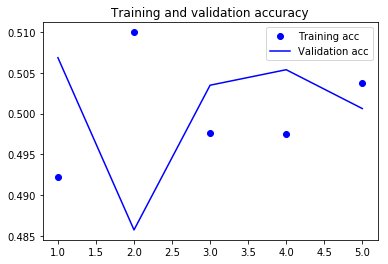

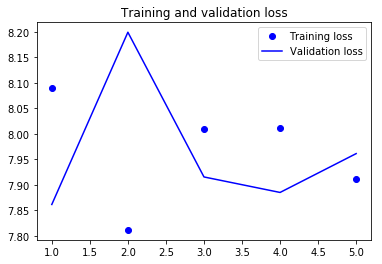

In [102]:
acc = train_model.history['acc']
val_acc = train_model.history['val_acc']
loss = train_model.history['loss']
val_loss = train_model.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()